In [47]:
%load_ext autoreload
%autoreload 2
#%autoreload 1
#%aimport jiang_package 


import QUANTAXIS as QA
import pandas as pd
#import modin.pandas as pd
import numpy as np
from pprint import  pprint as print

import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import lightgbm as lgb
import jiang_package as jp

import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def draw_pie(series):
    labels = []
    sizes = []
    for label in series.unique():
        labels.append(str(label))
        sizes.append(series[series==label].count())
    df=pd.DataFrame([labels,sizes]).T
    df=df.sort_values([0])
    df.index=range(len(df))
    print(df.T)
    plt.pie(sizes,labels=labels)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
stockCode=QA.QA_fetch_stock_list()['code'].tolist()
stockCode=stockCode[1:100]
data = QA.QA_fetch_stock_day_adv(stockCode, '2020-06-01', '2020-12-31').to_qfq()

In [39]:
dff=data.data.loc[(slice(None),'000002'),:]
dff

,,open,high,low,close,volume,amount,adj
date,code,,,,,,,
2020-03-02,000002,29.90,31.63,29.90,31.13,1375747.0,4.275882e+09,1.0
2020-03-03,000002,31.51,31.63,30.43,31.10,942831.0,2.913733e+09,1.0
2020-03-04,000002,31.28,32.45,30.74,32.26,1129796.0,3.595379e+09,1.0
2020-03-05,000002,31.78,32.70,31.60,32.30,924170.0,2.966840e+09,1.0
2020-03-06,000002,31.81,31.99,30.99,31.13,679528.0,2.124470e+09,1.0
2020-03-09,000002,30.60,31.13,30.01,30.55,843613.0,2.579914e+09,1.0
2020-03-10,000002,30.60,31.57,30.20,30.80,765993.0,2.358611e+09,1.0
2020-03-11,000002,30.83,31.00,30.36,30.38,563318.0,1.728509e+09,1.0
2020-03-12,000002,30.01,30.63,29.60,29.95,593494.0,1.776383e+09,1.0


In [125]:
from joblib import Parallel, delayed
import multiprocessing
def func_series_to_supervised(dataset, n_in=1):
    #dataset = pd.DataFrame(data)
    df_all=pd.DataFrame([])
    for i in range(n_in, -1, -1):      
        df_back=dataset.shift(i)      #把数据整体下移i格
        col_names=df_back.columns+'_'+str(i)   #数字后缀代表距当前的窗口期期数
        df_back.columns=col_names
        df_all=pd.concat([df_all,df_back],axis=1)
        #print(df_all.index)
    return df_all

def func_scale_axis0(se,groups):
    #部分不同列的数据具有相关性，需要统一标准化
    col_names=se.index
    for group in groups:
        col=[]
        group=pd.Series(group)
        group='^'+group+'_\d+$'
        ind=se.index
        for g in group:
            col=col+ind[ind.str.match(g)].to_list()
        assemble_scale_column=col
        ar=np.ravel(se[assemble_scale_column])
        ar=ar/ar.mean()
#         se[assemble_scale_column] = preprocessing.scale(ar)
        se[assemble_scale_column] = ar
    return se

#series_to_supervised(dataset,3)
@jp.fn_timer
def series_to_supervised(dataset,groups, n_in=1):
    df=dataset.groupby('code').apply(func_series_to_supervised,n_in)    #时间序列转换为监督学习样本
    df=df.apply(func_scale_axis0, args=(groups,),axis=1)
    return df

groups=[['open','high','low','close'],'volume','amount']
d=series_to_supervised(data.data,groups, n_in=3)


Total time running series_to_supervised: 68.1902117729187 seconds


In [26]:
from joblib import Parallel, delayed
import multiprocessing
def func_series_to_supervised(dataset, n_in=1):
    #dataset = pd.DataFrame(data)
    df_all=pd.DataFrame([])
    for i in range(n_in, -1, -1):      
        df_back=dataset.shift(i)      #把数据整体下移i格
        col_names=df_back.columns+'_'+str(i)   #数字后缀代表距当前的窗口期期数
        df_back.columns=col_names
        df_all=pd.concat([df_all,df_back],axis=1)
        #print(df_all.index)
    return df_all

def func_scale_axis0(se,groups):
    #部分不同列的数据具有相关性，需要统一标准化
    col_names=se.index
    for group in groups:
        col=[]
        group=pd.Series(group)
        group='^'+group+'_\d+$'
        ind=se.index
        for g in group:
            col=col+ind[ind.str.match(g)].to_list()
        assemble_scale_column=col
        ar=np.ravel(se[assemble_scale_column])
        ar=ar/ar.mean()    #去均值的中心化（均值变为0）
#         se[assemble_scale_column] = preprocessing.scale(ar)
        se[assemble_scale_column] = ar
    return se

#series_to_supervised(dataset,3)
def series_to_supervised(dataset,groups, n_in=1):
    df=func_series_to_supervised(dataset,n_in)    #时间序列转换为监督学习样本
    df=df.apply(func_scale_axis0, args=(groups,),axis=1)
    return df

groups=[['open','high','low','close'],'volume','amount']
# d=series_to_supervised(data.data,groups, n_in=3)
@jp.fn_timer
def run():
    re=Parallel(n_jobs=40)(delayed(series_to_supervised)(df, groups,20) for code,df in data.data.groupby('code'))
    return re
df=run()
# for code,df in data.data.groupby('code'):
#     series_to_supervised(df, groups,3)

Total time running series_to_supervised_parallel: 3.5959885120391846 seconds


In [6]:
@jp.fn_timer
def get_xy(start,end,n_days=1):
    stockCode=QA.QA_fetch_stock_list()['code'].tolist()
    stockCode=stockCode[1:100]
    data = QA.QA_fetch_stock_day_adv(stockCode, start, end).to_qfq()

    #1、生成标签（y）
    #获取当前股票n_days天后的最大涨幅和最小涨幅
    Y = data.add_func(jp.max_min_close_n_days,n_days)

    #2、生成样本（x）
    dataset1=jp.get_all_indicator(data)

    #3、标准化样本数据
    dataset1=jp.standardization(dataset1,('RSI1','RSI2','RSI3'))
    dataset2=jp.standardization(data.data,(['open','close','high','low'],'volume','amount'))
    
    #####4、合并样本
    dataset=pd.concat([dataset1,dataset2],axis=1)
    
    #####5、时间序列转监督学习（n天的数据生成一个样本）
    dataset=jp.series_to_supervised(dataset,10)

    #####定义Y值，加入样本中
    Y_names=['n_days_max_radio']
    dataset=pd.concat([dataset,Y[Y_names]],axis=1)

    #####删除空值超过90%的样本
    len_columns=len(dataset.columns)
    len1=len(dataset)
    dataset=dataset.dropna(thresh=len_columns*0.80)  #单个样本的非NA值小于thresh，就丢弃样本
    len2=len(dataset)
    print((len1,len2))
    
    #####生成X,Y
    dataset=dataset.astype('float16')
    Y=dataset[Y_names]
    X=dataset.drop(Y_names,axis=1)
    return X,Y

X_train,Y_train_1=get_xy('2019-01-01','2019-09-30')
X_test,Y_test_1=get_xy('2019-10-01','2019-12-31')

(17884, 17100)
Total time running get_xy: 17.249525785446167 seconds
(5917, 5133)
Total time running get_xy: 7.403738975524902 seconds


In [27]:
def split_bin(data,bins=6):
    data=data.copy()
    bins=pd.cut(data.iloc[:,0],bins,retbins=False)
    data.iloc[:,0]=LabelEncoder().fit_transform(bins)
    return data
Y_train_2=split_bin(Y_train_1)
Y_test_2=split_bin(Y_test_1)

Text(0, 0.5, 'values of tip_pct')

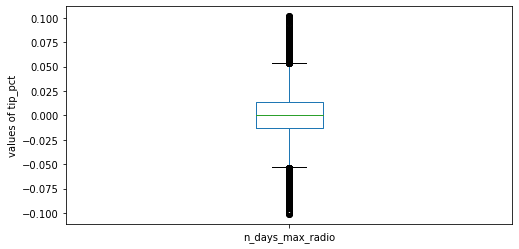

In [3]:
plt.rcParams['figure.figsize'] = (8.0, 4.0) # 设置figure_size尺寸
fig,axes = plt.subplots()
# dataset.iloc[:,1:6].plot(kind='box',ax=axes)
Y_train_1.plot(kind='box',ax=axes)
axes.set_ylabel('values of tip_pct')

In [23]:
profile = pandas_profiling.ProfileReport(X_test)
profile.to_file("/home/jiang/www/download_web/instance/file/output_file.html")
#Y_train_1.profile_report(title='Titanic Dataset')

In [ ]:
Y_train=Y_train_1
Y_test=Y_test_1

params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l1'},
    'num_leaves': 31,
    'learning_rate': 0.001,
    'feature_fraction': 0.6,
    'bagging_fraction': 0.4,
    'bagging_freq': 5,
    'verbose': 0,
    'num_threads':40
}

lgb_train = lgb.Dataset(X_train,Y_train)
lgb_eval = [lgb.Dataset(X_test,Y_test,reference=lgb_train),lgb_train]
model=lgb.train(params,lgb_train,num_boost_round=1000,valid_sets=lgb_eval,early_stopping_rounds=300)
    

In [28]:
Y_train=Y_train_2
Y_test=Y_test_2

params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'metric': ['multi_logloss'],
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 0.6,
    'bagging_fraction': 0.4,
    'bagging_freq': 5,
    'verbose': 0,
    'num_class':6,
    'num_threads':40,
    'is_unbalance':True
}

lgb_train = lgb.Dataset(X_train,Y_train)
lgb_eval = [lgb.Dataset(X_test,Y_test,reference=lgb_train),lgb_train]
model=lgb.train(params,lgb_train,num_boost_round=1000,valid_sets=lgb_eval,early_stopping_rounds=300)
    

[1]	training's multi_logloss: 1.21204	valid_0's multi_logloss: 1.02687
Training until validation scores don't improve for 300 rounds
[2]	training's multi_logloss: 1.21018	valid_0's multi_logloss: 1.02675
[3]	training's multi_logloss: 1.20835	valid_0's multi_logloss: 1.02659
[4]	training's multi_logloss: 1.20659	valid_0's multi_logloss: 1.02653
[5]	training's multi_logloss: 1.2049	valid_0's multi_logloss: 1.02644
[6]	training's multi_logloss: 1.20324	valid_0's multi_logloss: 1.02626
[7]	training's multi_logloss: 1.20165	valid_0's multi_logloss: 1.02605
[8]	training's multi_logloss: 1.20004	valid_0's multi_logloss: 1.02589
[9]	training's multi_logloss: 1.19846	valid_0's multi_logloss: 1.02576
[10]	training's multi_logloss: 1.19697	valid_0's multi_logloss: 1.02561
[11]	training's multi_logloss: 1.19537	valid_0's multi_logloss: 1.02545
[12]	training's multi_logloss: 1.1937	valid_0's multi_logloss: 1.02521
[13]	training's multi_logloss: 1.19219	valid_0's multi_logloss: 1.02503
[14]	training

[226]	training's multi_logloss: 1.01014	valid_0's multi_logloss: 1.02423
[227]	training's multi_logloss: 1.00955	valid_0's multi_logloss: 1.0243
[228]	training's multi_logloss: 1.009	valid_0's multi_logloss: 1.02428
[229]	training's multi_logloss: 1.0084	valid_0's multi_logloss: 1.02431
[230]	training's multi_logloss: 1.00779	valid_0's multi_logloss: 1.0243
[231]	training's multi_logloss: 1.00718	valid_0's multi_logloss: 1.02427
[232]	training's multi_logloss: 1.00661	valid_0's multi_logloss: 1.02432
[233]	training's multi_logloss: 1.00598	valid_0's multi_logloss: 1.02431
[234]	training's multi_logloss: 1.00541	valid_0's multi_logloss: 1.02436
[235]	training's multi_logloss: 1.00485	valid_0's multi_logloss: 1.02441
[236]	training's multi_logloss: 1.0043	valid_0's multi_logloss: 1.02445
[237]	training's multi_logloss: 1.0037	valid_0's multi_logloss: 1.02452
[238]	training's multi_logloss: 1.00311	valid_0's multi_logloss: 1.02456
[239]	training's multi_logloss: 1.00252	valid_0's multi_lo

In [29]:
model.feature_importance()

array([193, 197, 188, 173, 195, 213, 349, 437, 365, 139, 176, 230, 170,
       238, 184, 216, 152, 245, 204, 183, 144, 220, 153, 161, 135, 168,
       135, 272, 267, 133, 114, 118, 104, 102,  92, 150, 122, 273, 233,
        54, 108, 118,  82, 118, 106, 116,  88, 213, 170,  25, 106, 113,
        83, 121, 111, 126,  86, 187, 171,  19, 116, 120, 101,  92,  98,
       108,  93, 304, 212,  32, 101, 105, 100,  96,  88, 129, 137, 212,
       194,  32, 102, 124, 119, 130, 102, 189, 119, 268, 197,  34, 110,
       122, 110, 115, 120, 131, 108, 273, 171,  30, 113, 140, 109, 113,
       154, 148, 142, 241, 190,  22], dtype=int32)

0.49183303085299457
    0    1     2     3    4   5
0   0    1     2     3    4   5
1  12  100  1602  1445  102  45


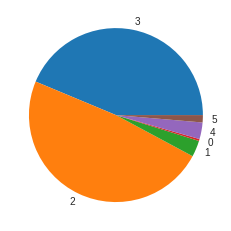

In [80]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
    
y_true=Y_test.values.flatten()
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)

print(accuracy_score(y_true, y_pred))
data=pd.DataFrame([y_true, y_pred]).T
#plt.hist(y_pred,bins=6,stacked=True,histtype='step')

draw_pie(data[0])

      0    1
0     2    3
1  2702  604


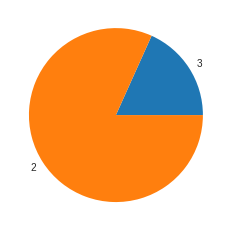

In [82]:
draw_pie(data[1])

In [79]:
y_pred_pa = model.predict(X_test)  # !!!注意lgm预测的是分数，类似 sklearn的predict_proba
y_test_oh = label_binarize(Y_test, classes= range(6))
roc_auc_score(y_test_oh, y_pred_pa, average='micro')

0.8760222389839881

Text(0, 0.5, 'values of tip_pct')

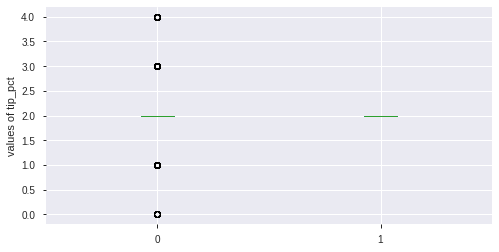

In [26]:
plt.rcParams['figure.figsize'] = (8.0, 4.0) # 设置figure_size尺寸
fig,axes = plt.subplots()
# dataset.iloc[:,1:6].plot(kind='box',ax=axes)
data.plot(kind='box',ax=axes)
axes.set_ylabel('values of tip_pct')